Install Dependencies & necessary Imports

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Verifying Pretrained Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/flir_7- photo.jpg' save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/flir_7- photo.jpg: 480x640 1 car, 44.4ms
Speed: 4.8ms preprocess, 44.4ms inference, 861.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


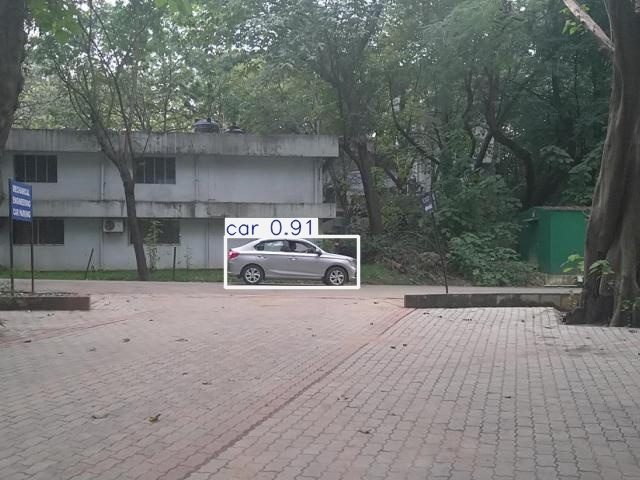

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/predict/flir_7- photo.jpg', height=600)

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='/content/flir_7- photo.jpg', conf=0.25)


image 1/1 /content/flir_7- photo.jpg: 480x640 1 car, 214.5ms
Speed: 13.0ms preprocess, 214.5ms inference, 2025.9ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
results[0].boxes.xyxy

tensor([[225.6539, 236.7055, 358.7731, 287.0779]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.9087], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([2.], device='cuda:0')

Finetuning

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True batch=32

/content
100% 21.5M/21.5M [00:00<00:00, 305MB/s]
New https://pypi.org/project/ultralytics/8.3.56 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/annotations-1/data.yaml, epochs=25, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=N

/content


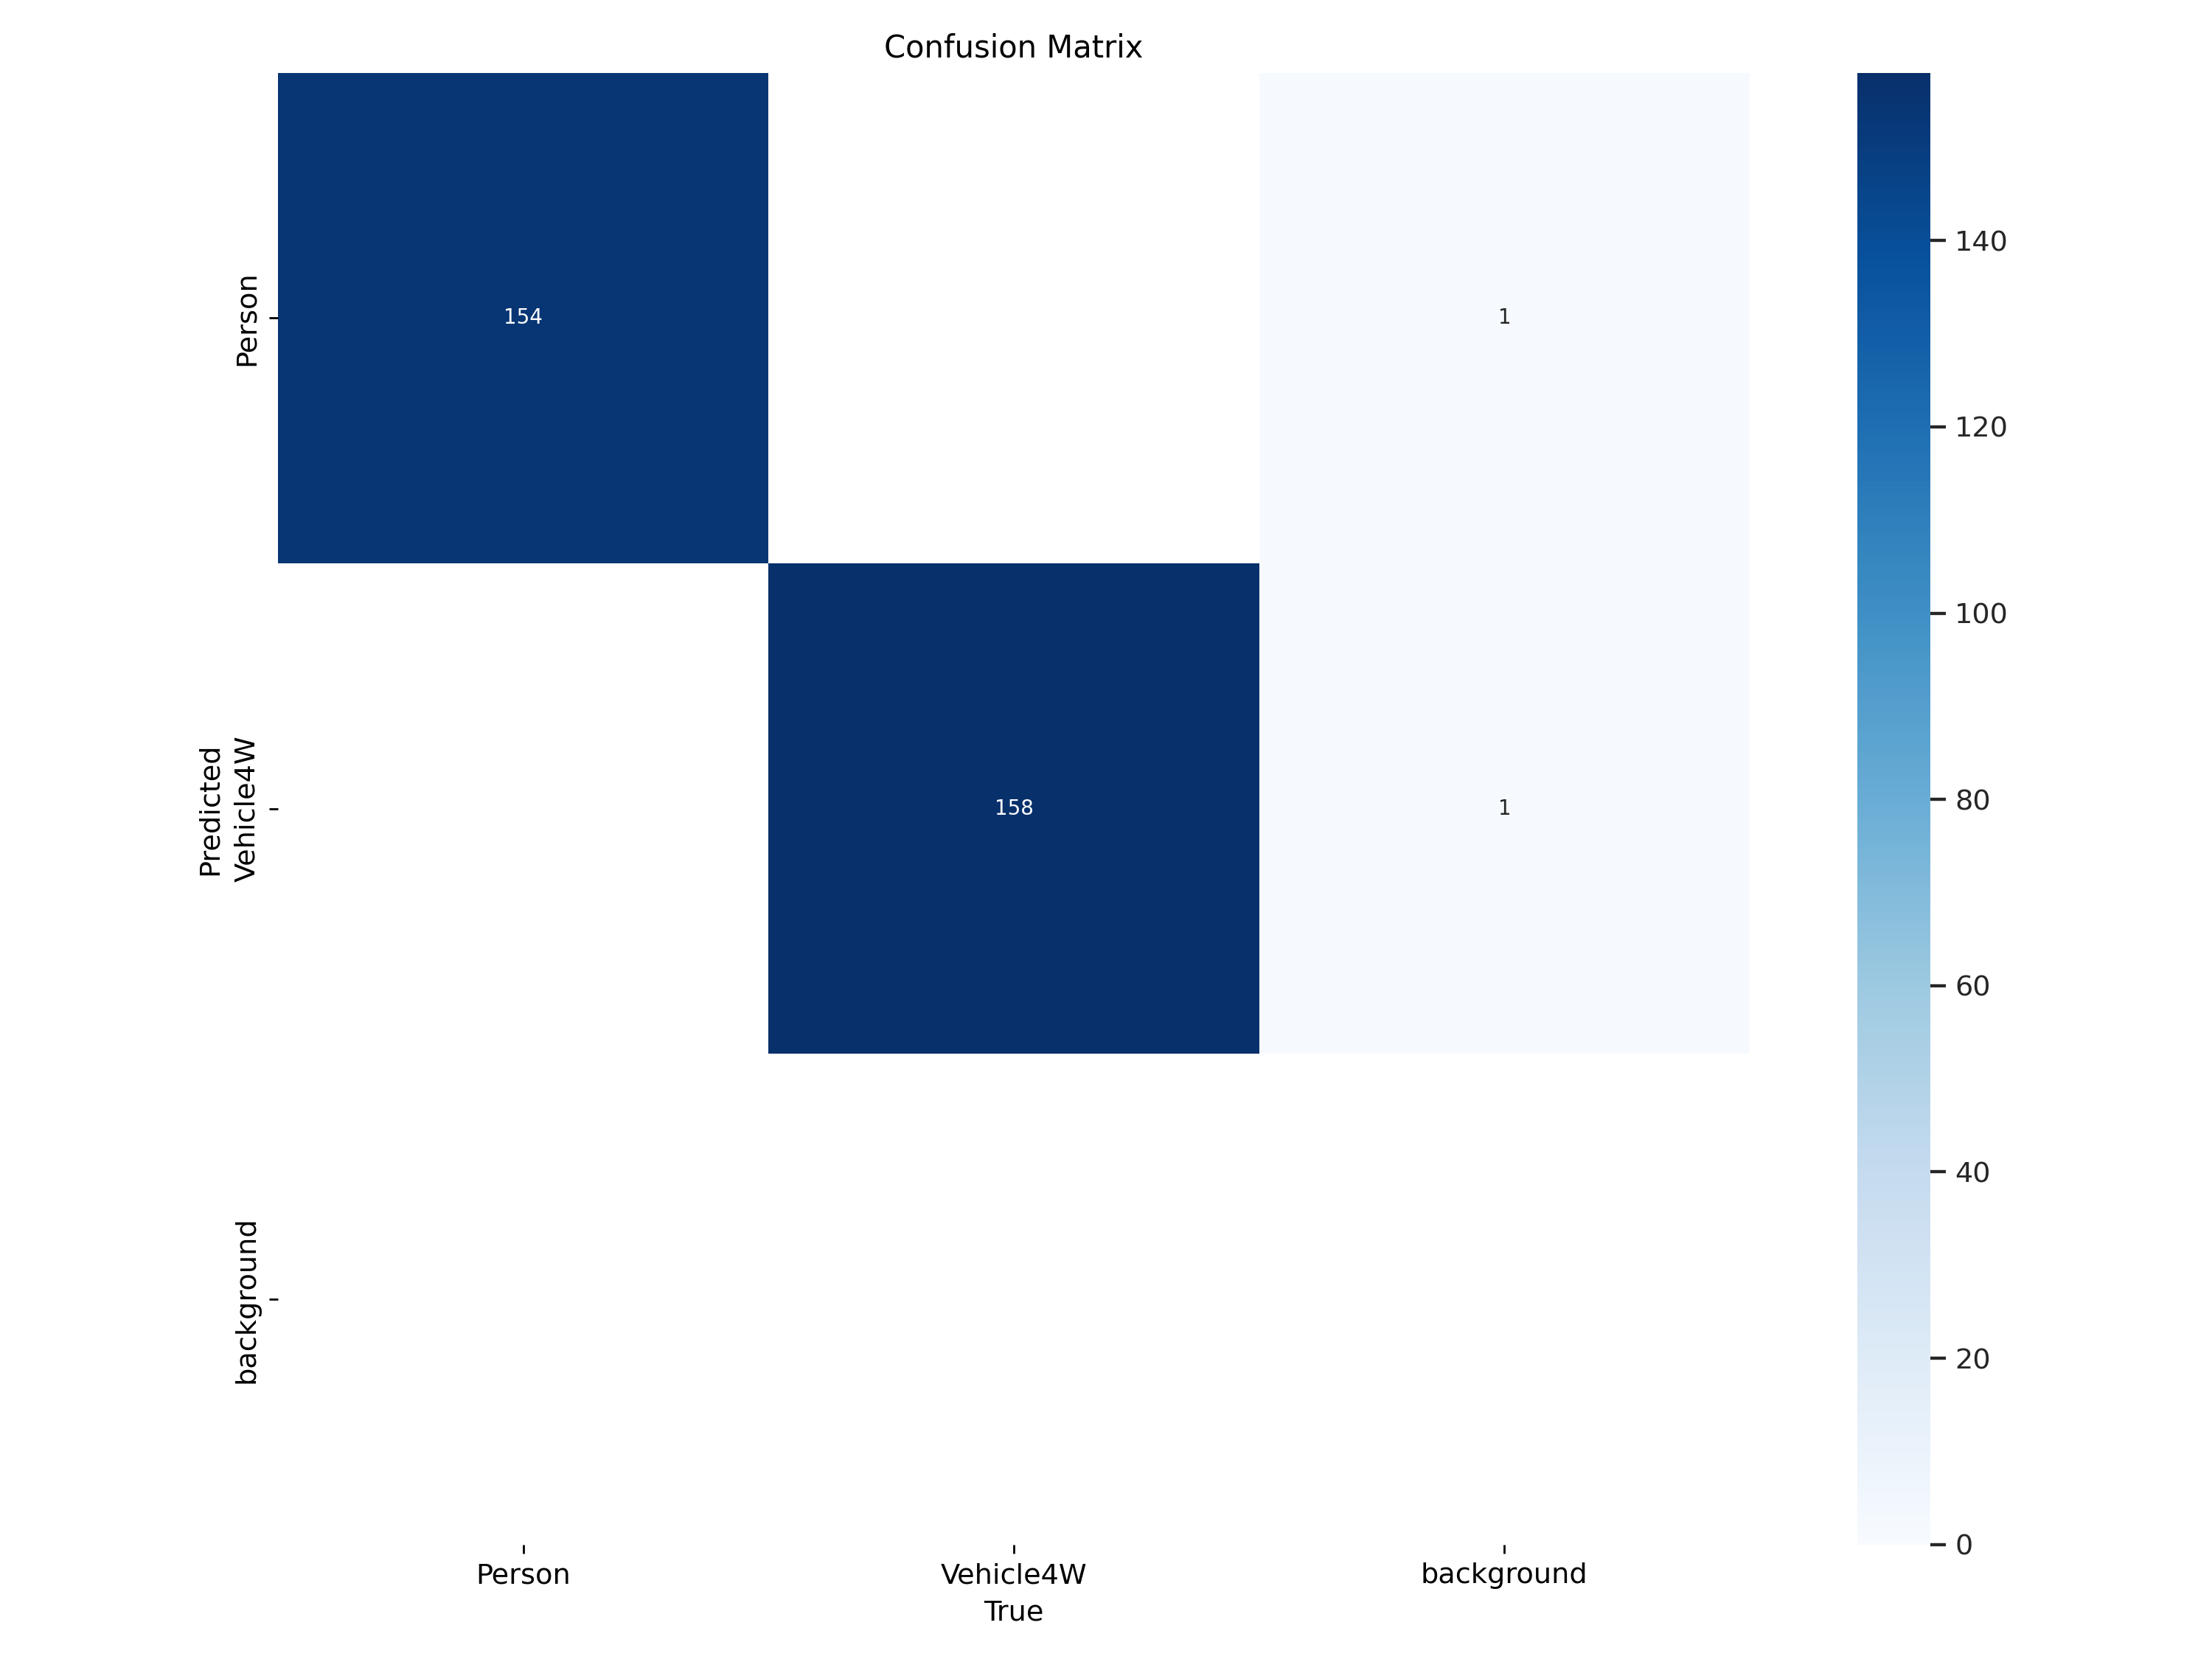

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


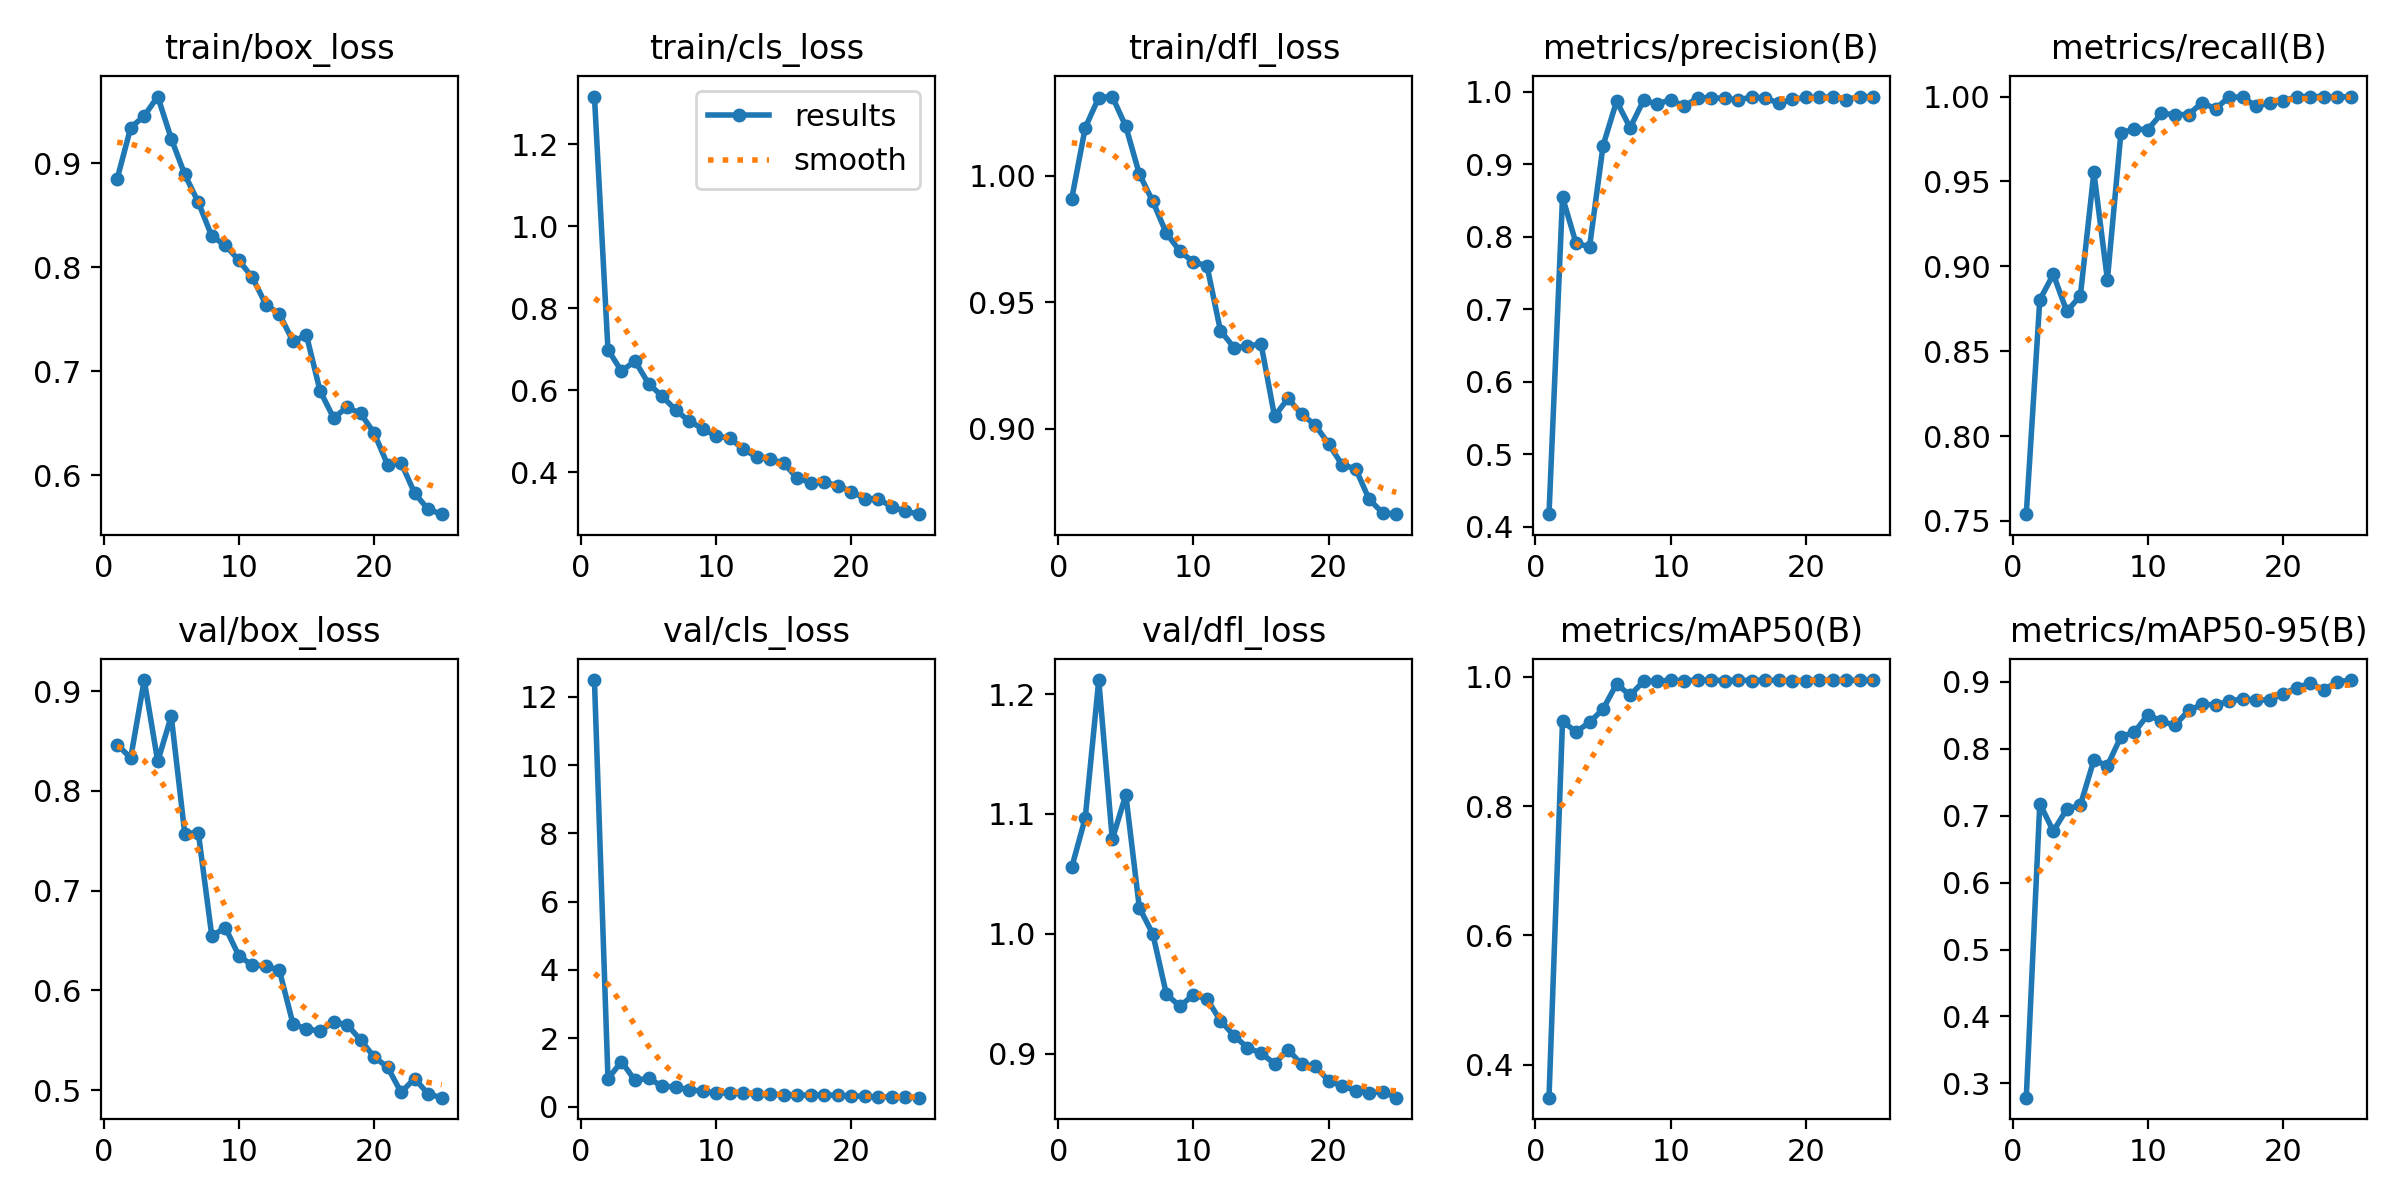

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


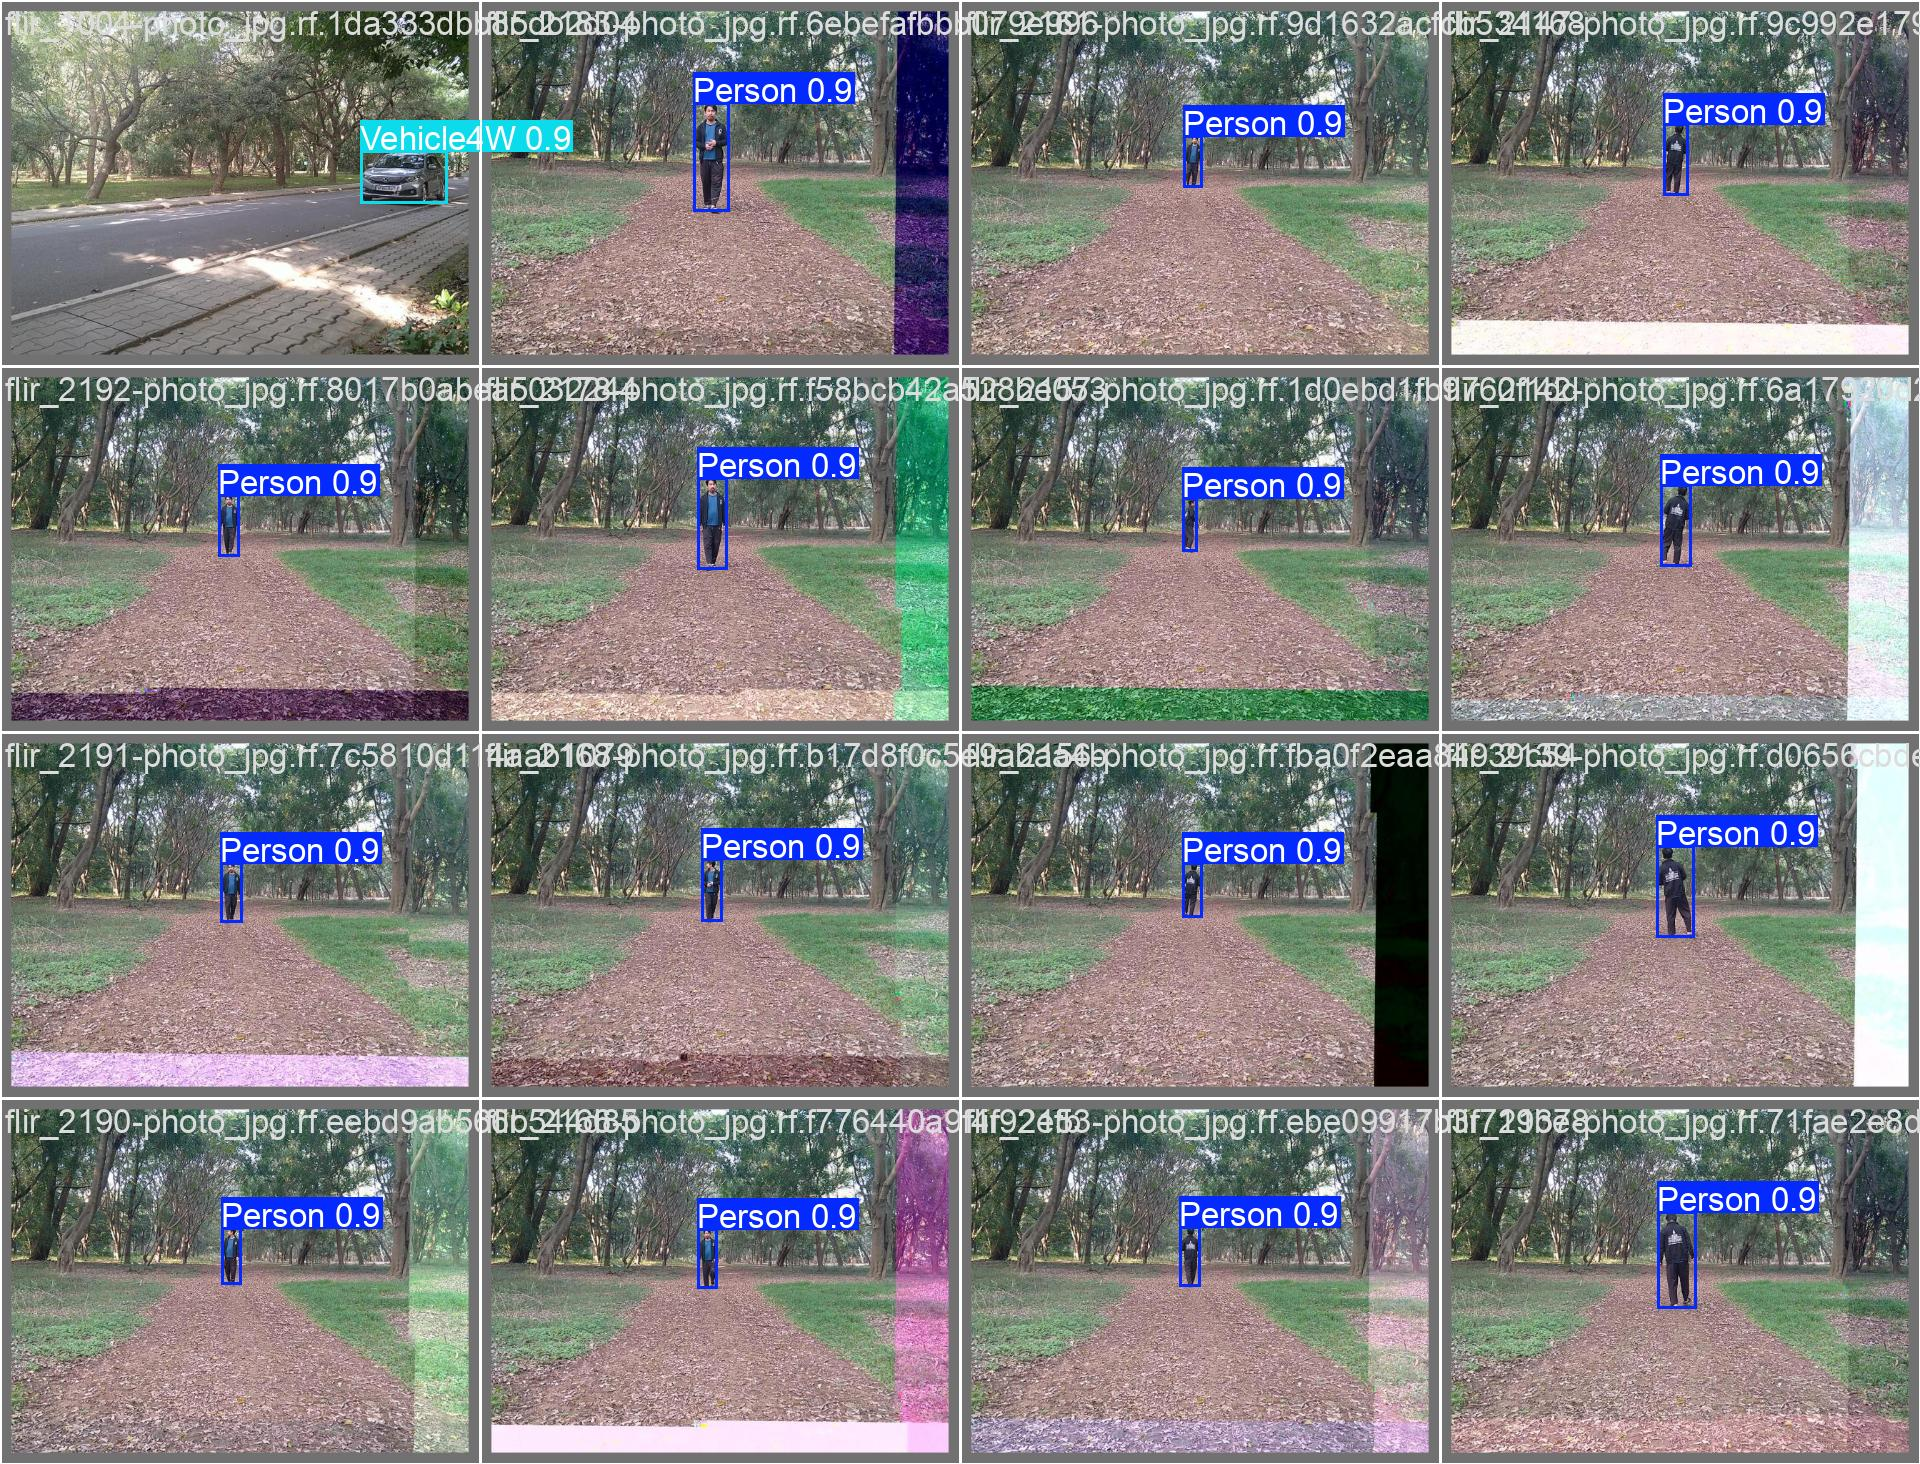

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

Evaluation

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/annotations-1/valid/labels.cache... 346 images, 34 backgrounds, 0 corrupt: 100% 346/346 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:06<00:00,  3.26it/s]
                   all        346        312      0.993          1      0.994      0.903
                Person        154        154      0.993          1      0.994      0.871
             Vehicle4W        158        158      0.993          1      0.995      0.935
Speed: 1.3ms preprocess, 6.8ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml split=test

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/annotations-1/test/labels... 390 images, 47 backgrounds, 0 corrupt: 100% 390/390 [00:00<00:00, 1846.59it/s]
val: New cache created: /content/annotations-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:07<00:00,  3.53it/s]
                   all        390        343      0.996      0.996      0.995      0.906
                Person        187        187          1      0.991      0.995      0.869
             Vehicle4W        156        156      0.992          1      0.994      0.943
Speed: 1.3ms preprocess, 7.5ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val
